<a href="https://colab.research.google.com/github/bzizmza/First-Project---Predictive-Analytics/blob/main/FirstProject_PredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Pertama: Predictive Analytics
**by Abimanyu Sri Setyo**

**Project Criteria**
* The project is the result of your own work.
* The project has never been used for Machine Learning class submission in Dicoding and has not been published on any platform.
* The dataset used is quantitative data (minimum 500 data samples).
* Provide documentation using text cells in notebooks (.ipynb) to explain each stage of the project.
* Determine the solution to the problem using a machine learning or deep learning approach by selecting one of the following solutions:
  * Classification
  * Regression
  * Clustering
  * Time series and forecasting
* Draft a machine learning project report that explains the flow of your project from the selection of problem domains (problem domains), data understanding, data preparation, modeling, to the evaluation stage.

**About Project**<br>
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease, as well as predict the overall risk using logistic regression.

**About Dataset**<br>
The dataset is publically available on the [Kaggle](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression) website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

## Table of Contents

>[Proyek Pertama: Predictive Analytics](#scrollTo=oVkd8OaESZmF)

>>[Table of Contents](#scrollTo=wYT6S5r6X8Zd)

>>[Data Loading](#scrollTo=gGlozs7XMUR4)

>>>[Import Libraries](#scrollTo=Y15PjaxcNaR5)

>>>[Import Dataset](#scrollTo=YAPeViMJNg9x)

>>[Exploratory Data Analysis](#scrollTo=09MT7xZ_MYz6)

>>>[Variable Description](#scrollTo=vd_c03NnNAZU)

>>>[Handle missing values](#scrollTo=qwYh6npMNDT0)

>>>[Univariate Analysis](#scrollTo=cK5yi4dNOX9k)

>>>[Multivariate Analysis](#scrollTo=waRBmgKORUyk)

>>[Data Preparation](#scrollTo=ofVVDHdNSLhY)

>>>[Train-Test-Split](#scrollTo=jCqqdYseTiwa)

>>>[Standarisasi](#scrollTo=6KPtlArFT4Zq)

>>[Model Development](#scrollTo=KNzlcAnVWsxL)

>>>[Model Development using Logistic Regression](#scrollTo=vc5jo7DDWzvP)

>>>[Model Development dengan Random Forest](#scrollTo=88XbFKceuspb)

>>[Testing the Model](#scrollTo=7F2DA_iS4aYu)

>>[Evaluasi Model](#scrollTo=oxLz0rFzvGgK)

>>>[Accuracy of the Model](#scrollTo=UwiIQ8wj5H6j)

>>>[MSE of the Model](#scrollTo=4s9dOlqd5N-8)

>>[Logistic Regression Bias Weight and Value](#scrollTo=-VEQ86HGkZ9b)

>>[Confusion Matrix Logistic Regression](#scrollTo=XeicNrSh6aFl)

>>[Confusion Matrix visualization using Heatmap](#scrollTo=z_wknNOs65T7)



## Data Loading
Preparing the dataset for use

### Import Libraries
Import the required libraries

In [1]:
import zipfile
import os
import glob 
import warnings


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Import Dataset
Importing datasets, here the datasets used are sourced from [Kaggle](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression), so installation of the [Kaggle library](https://pypi.org/project/kaggle/) is required.

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download dileep070/heart-disease-prediction-using-logistic-regression

  0% 0.00/58.4k [00:00<?, ?B/s]
100% 58.4k/58.4k [00:00<00:00, 48.6MB/s]


In [5]:
local_zip = '/content/heart-disease-prediction-using-logistic-regression.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/heart-disease')
zip_ref.close()

In [6]:
%cd heart-disease
%ls

/content/heart-disease
framingham.csv


In [7]:
data = pd.read_csv("/content/heart-disease/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Exploratory Data Analysis
Quoted from [algorit.ma](https://algorit.ma/blog/exploratory-data-analysis-2022/), Exploratory Data Analysis covers the critical process of preliminary investigation tests on data to identify patterns, find anomalies, test hypotheses, and check assumptions through summary statistics and graphical (visual) representations.

### Variable Description
Take an in-depth look at what's interesting to see in the dataset.

In [8]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Drop unneeded columns
Drop "education" column because that doesn't affect prediction

In [10]:
# Check the data size to ensure rows before execution
data.shape

(4238, 16)

In [11]:
data = data.drop('education', axis='columns')

# Recheck the data size to make sure the row has been dropped in this execution
data.shape

(4238, 15)

### Handle missing values
According to [DQLab.id](https://www.dqlab.id/kursus-belajar-data-mengenal-apa-itu-missing-value), missing values will make the data unusable, and it's a shame to throw away important information in many rows just because of 1-2 missing values, so one of the right steps is to fill in the missing values. Filling in the data using the median will help "neutralize" the missing data, because filling in the median will not shift or increase the variance of the data.

In [12]:
# Check NaN values
print ("Sum of\t->\tColumn")
print ("Values")
print ("=======================")
for i in data.columns:
    print (str(data[i].isna().sum()) + "\t->\t" + i)

Sum of	->	Column
Values
0	->	male
0	->	age
0	->	currentSmoker
29	->	cigsPerDay
53	->	BPMeds
0	->	prevalentStroke
0	->	prevalentHyp
0	->	diabetes
50	->	totChol
0	->	sysBP
0	->	diaBP
19	->	BMI
1	->	heartRate
388	->	glucose
0	->	TenYearCHD


In [13]:
# View datasets based on the column with the most missing values
data.loc[(data['glucose'].isnull())]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
42,0,52,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
54,0,39,1,20.0,0.0,0,0,0,209.0,115.0,75.0,22.54,90.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,0,41,1,5.0,0.0,0,0,0,205.0,105.0,74.0,20.85,87.0,NaN,0
4208,0,51,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0


In [14]:
# Check the data size to ensure rows before execution
data.shape

(4238, 15)

In [15]:
# Replace the NaN value in the 'cigsPerDay' column with the median
data['cigsPerDay'] = data['cigsPerDay'].fillna((data['cigsPerDay'].median()))

# Replace the NaN value in the 'BPMeds' column with the median
data['BPMeds'] = data['BPMeds'].fillna((data['BPMeds'].median()))

# Replace the NaN value in the 'totChol' column with the median
data['totChol'] = data['totChol'].fillna((data['totChol'].median()))

# Replace the NaN value in the 'BMI' column with the median
data['BMI'] = data['BMI'].fillna((data['BMI'].median()))

# Replace the NaN value in the 'glucose' column with the median
data['glucose'] = data['glucose'].fillna((data['glucose'].median()))

# Replace the NaN value in the 'heartRate' column with the median
data['heartRate'] = data['heartRate'].fillna((data['heartRate'].median()))

# Check the data size to make sure the row has been execution
data.shape

(4238, 15)

In [16]:
# Recheck NaN values
print ("Sum of\t->\tColumn")
print ("Values")
print ("=======================")
for i in data.columns:
    print (str(data[i].isna().sum()) + "\t->\t" + i)

Sum of	->	Column
Values
0	->	male
0	->	age
0	->	currentSmoker
0	->	cigsPerDay
0	->	BPMeds
0	->	prevalentStroke
0	->	prevalentHyp
0	->	diabetes
0	->	totChol
0	->	sysBP
0	->	diaBP
0	->	BMI
0	->	heartRate
0	->	glucose
0	->	TenYearCHD


### Univariate Analysis
Sourced from the [SanberCode Blog](https://blog.sanbercode.com/docs/materi-eda/univariate-bivariate-multivariate-analysis/), Univariate Analysis is a technique for understanding and exploring data. The prefix 'Uni' means 'one', so univariate analysis is a single feature data analysis.

In [17]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [18]:
# Set Categorical and Numerical Features of Dataset 
categorical_features = ['male','currentSmoker', 'prevalentStroke','prevalentHyp' , 'diabetes','TenYearCHD']
numerical_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

**Categorical Features**

Fitur male

   jumlah sampel  persentase
0           2419        57.1
1           1819        42.9


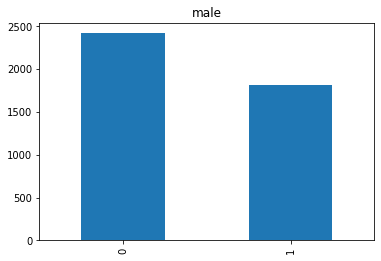

In [19]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Fitur currentSmoker

   jumlah sampel  persentase
0           2144        50.6
1           2094        49.4


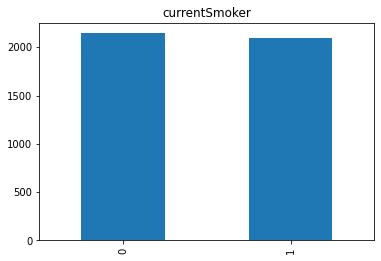

In [20]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Fitur prevalentStroke

   jumlah sampel  persentase
0           4213        99.4
1             25         0.6


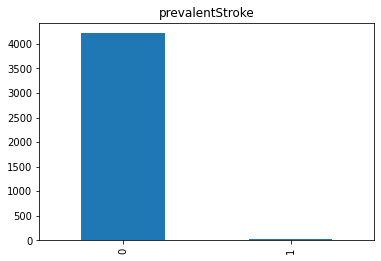

In [21]:
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Fitur prevalentHyp

   jumlah sampel  persentase
0           2922        68.9
1           1316        31.1


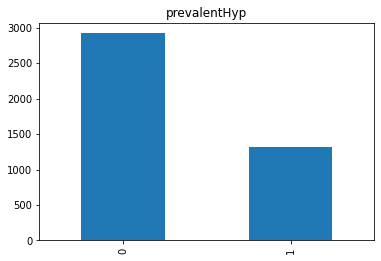

In [22]:
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Fitur diabetes

   jumlah sampel  persentase
0           4129        97.4
1            109         2.6


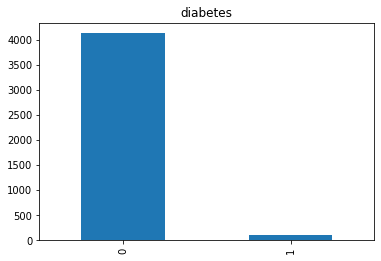

In [23]:
feature = categorical_features[4]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Fitur TenYearCHD

   jumlah sampel  persentase
0           3594        84.8
1            644        15.2


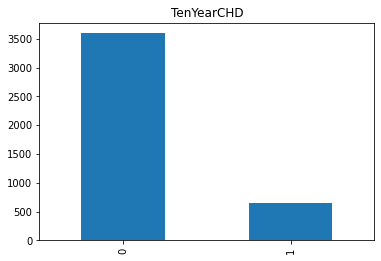

In [24]:
feature = categorical_features[5]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Numerical Features**

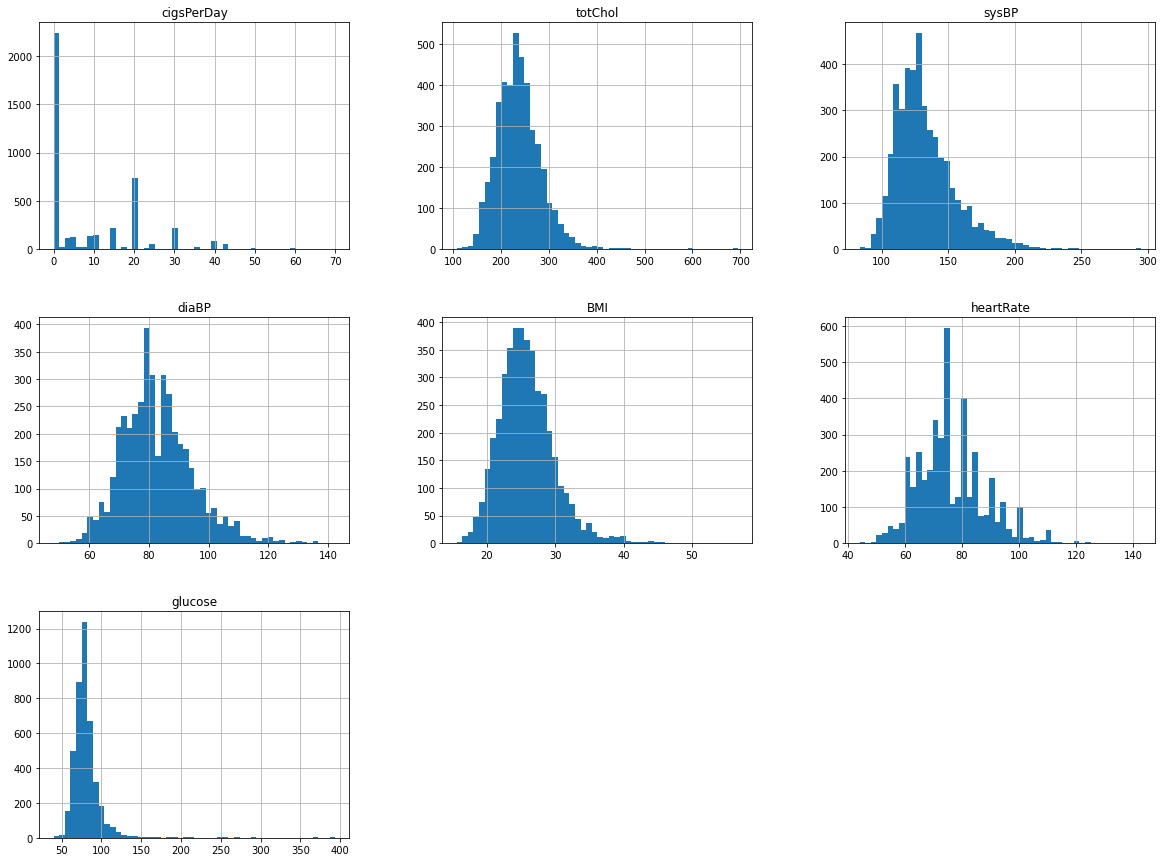

In [25]:
data[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis
Multivariate analysis is used to analyze more than 2 variables at the same time, the resulting trends can be multidimensional in nature, this analysis will help us understand which data has complex trends in attribute combinations.

Text(0.5, 1.0, 'Correlation Matrix')

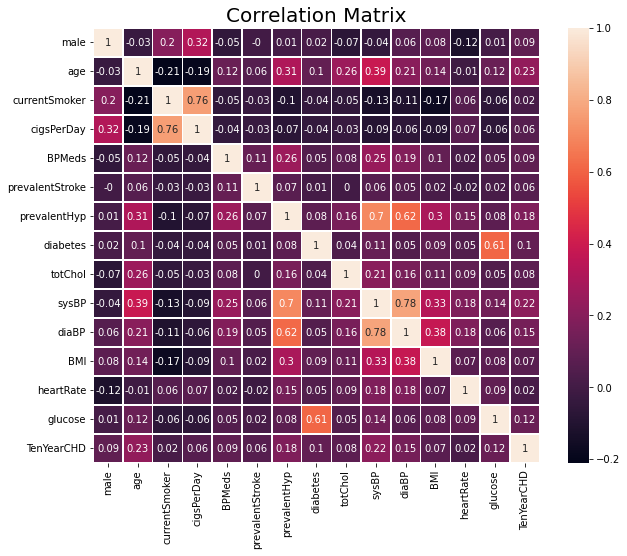

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Matrix", size=20)

In [27]:
data.drop(['BPMeds', 'prevalentStroke', 'diabetes'],axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Text(0.5, 1.0, 'Correlation Matrix')

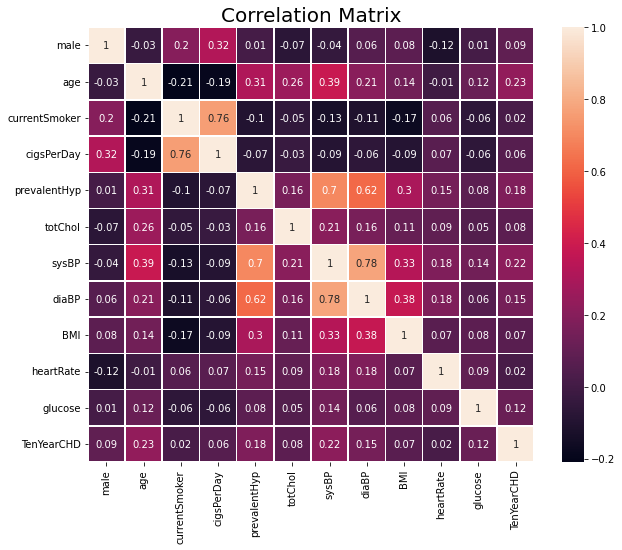

In [28]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Matrix", size=20)

## Data Preparation

### Train-Test-Split

In [29]:
X = data.drop(["TenYearCHD"], axis = 1)
y = data["TenYearCHD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [30]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4238
Total # of sample in train dataset: 3178
Total # of sample in test dataset: 1060


### Standarisasi

In [31]:
scaler_train = StandardScaler()
scaler_train.fit(X_train[numerical_features])
X_train[numerical_features] = scaler_train.transform(X_train.loc[:, numerical_features])

scaler_test = StandardScaler()
scaler_test.fit(X_test[numerical_features])
X_test[numerical_features] = scaler_train.transform(X_test.loc[:, numerical_features])

In [32]:
X_train[numerical_features].describe().round(4)

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3178.0000,3178.0000,3178.0000,3178.0000,3178.0000,3178.0000,3178.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002
min,-0.7638,-2.9093,-2.2149,-2.9298,-2.5049,-2.6013,-1.8184
25%,-0.7638,-0.6932,-0.6960,-0.7104,-0.6682,-0.6746,-0.4111
50%,-0.7638,-0.0664,-0.1972,-0.0822,-0.1087,-0.0882,-0.1602
75%,0.9173,0.5603,0.5282,0.5878,0.5220,0.5819,0.1453
max,4.2795,10.2753,7.3748,4.7754,7.5425,5.6079,13.6293


## Model Development

### Model Development using Logistic Regression
Linear Regression is a way of modeling the problem of the relationship between an independent variable and the dependent variable.

In [33]:
model_logRes = LogisticRegression(max_iter=1000)

In [34]:
model_logRes.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Model Development using Random Forest
Random Forest is an algorithm that combines the outputs of several decision trees to achieve one result by being formed from many trees (trees) obtained through the bagging or bootstrap aggregating process.

In [35]:
model_RF = RandomForestRegressor(n_estimators=1000, max_depth=16, random_state=55, n_jobs=1)

In [36]:
model_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=1000, n_jobs=1,
                      random_state=55)

## Testing the Model

In [37]:
y_pred_logRes = model_logRes.predict(X_test)
y_pred_RF = model_RF.predict(X_test)

## Model Evaluation

### LogisticRegression Model

In [38]:
preds_logRes=model_logRes.predict(X_test)

In [39]:
accuracy_logRes=(model_logRes.score(X_test,y_test).round(3))
print("Logistic Regression Accuracy\t: {:.2f}".format(accuracy_logRes))

Logistic Regression Accuracy	: 0.86


### Random Forest Model

In [40]:
preds_RF=model_RF.predict(X_test)

In [41]:
accuracy_RF=(model_RF.score(X_test,y_test).round(3))
print("Random Forest Accuracy\t: {:.2f}".format(accuracy_RF))

Random Forest Accuracy	: 0.03


### Compare and get the best model
Based on the testing, it can be seen that the accuracy of the Logistic Regression model has a much higher accuracy than the Random Forest. Therefore, the model chosen is Logistic Regression.

In [42]:
model = pd.DataFrame({'Logistic Regression': [accuracy_logRes], 'Random Forest': [accuracy_RF]}, index=['Accuracy'])
model

,Logistic Regression,Random Forest
Accuracy,0.864,0.028


### MSE of the Model

In [43]:
mse = pd.DataFrame(columns=['train', 'test'], index=['Logistic Regression','Random Forest'])
model_dict = {'Logistic Regression': model_logRes, 'Random Forest': model_RF}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
mse

,train,test
Logistic Regression,0.000148,0.000136
Random Forest,0.000025,0.000119


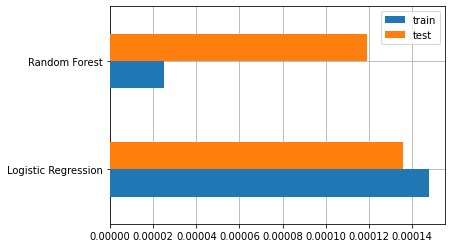

In [44]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Based on the testing, it can be seen that the accuracy of the Logistic Regression model has a much higher accuracy than the Random Forest. Therefore, the model chosen is Logistic Regression.